In [1]:
import pandas as pd
input_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data Repo/Phase 2/data/114239_nfl_competition_files_published_analytics_final/train/input_2023_w01.csv")
output_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data Repo/Phase 2/data/114239_nfl_competition_files_published_analytics_final/train/output_2023_w01.csv")
supplementary_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data Repo/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

/var/folders/zy/zhqnxw4n3gx553hrq1vzrmz00000gn/T/ipykernel_3860/2947634570.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  supplementary_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data Repo/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")


In [3]:
# Filter input and output for play 194

play_194_data = input_data[
    (input_data['game_id'] == 2023090700) &
    (input_data['play_id'] == 194)
]

# Preview
play_194_data.head()

game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
234  2023090700      194               True   44888         1           left   
235  2023090700      194               True   44888         2           left   
236  2023090700      194               True   44888         3           left   
237  2023090700      194               True   44888         4           left   
238  2023090700      194               True   44888         5           left   

     absolute_yardline_number    player_name player_height  player_weight  \
234                        89  Alex Anzalone           6-3            240   
235                        89  Alex Anzalone           6-3            240   
236                        89  Alex Anzalone           6-3            240   
237                        89  Alex Anzalone           6-3            240   
238                        89  Alex Anzalone           6-3            240   

     ...         player_role      x      y    s    a    dir       o  \
234  ...  Defensive Coverage  84.92  32.43  0.0  0.0  93.22  100.58   
235  ...  Defensive Coverage  84.92  32.43  0.0  0.0  83.90  100.58   
236  ...  Defensive Coverage  84.93  32.43  0.0  0.0  82.27  100.58   
237  ...  Defensive Coverage  84.93  32.43  0.0  0.0  77.68  100.58   
238  ...  Defensive Coverage  84.94  32.43  0.0  0.0  79.56  100.58   

     num_frames_output  ball_land_x  ball_land_y  
234                  9    84.940002        21.75  
235                  9    84.940002        21.75  
236                  9    84.940002        21.75  
237                  9    84.940002        21.75  
238                  9    84.940002        21.75  

[5 rows x 23 columns]

In [4]:
players_in_play = play_194_data['nfl_id'].unique()
players_in_play_names = play_194_data[['nfl_id', 'player_name']].drop_duplicates()
players_in_play_names

nfl_id               player_name
234   44888             Alex Anzalone
266   55910              Brian Branch
298   47888      C.J. Gardner-Johnson
330   44906            Cameron Sutton
362   53953              Jerry Jacobs
394   54562              Kerby Joseph
426   54653         Malcolm Rodriguez
458   46213             Justin Watson
490   46243  Marquez Valdes-Scantling
522   53591                 Noah Gray
554   54519                Skyy Moore
586   44822           Patrick Mahomes
618   41325           Jerick McKinnon

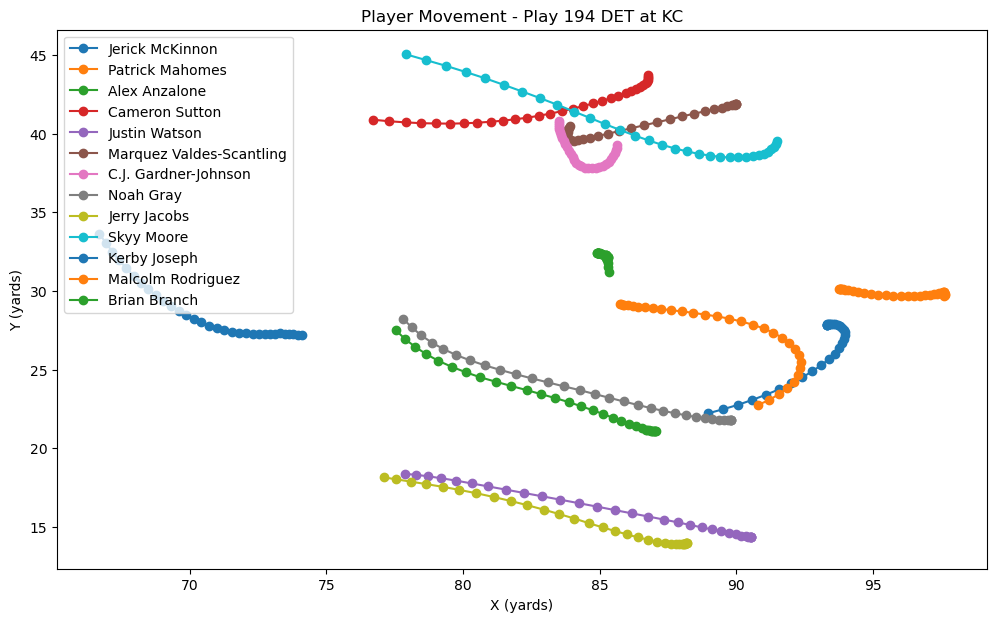

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

for nfl_id, player_df in play_194_data.groupby('nfl_id'):
    plt.plot(player_df['x'], player_df['y'], marker='o', label=player_df['player_name'].iloc[0])

plt.xlabel('X (yards)')
plt.ylabel('Y (yards)')
plt.title('Player Movement - Play 194 DET at KC')
plt.legend()
plt.show()

In [6]:
player_speed_stats = play_194_data.groupby('player_name')['s'].agg(['min', 'max', 'mean']).reset_index()
player_speed_stats.rename(columns={'s': 'speed'}, inplace=True)
player_speed_stats

player_name   min   max      mean
0              Alex Anzalone  0.00  3.14  0.576875
1               Brian Branch  0.09  6.33  3.840313
2       C.J. Gardner-Johnson  1.12  2.21  1.745313
3             Cameron Sutton  1.04  6.16  3.556250
4            Jerick McKinnon  0.00  6.13  2.723750
5               Jerry Jacobs  0.13  6.71  3.789062
6              Justin Watson  0.00  7.11  4.165625
7               Kerby Joseph  1.56  6.40  3.433125
8          Malcolm Rodriguez  0.14  5.49  3.620625
9   Marquez Valdes-Scantling  0.00  5.25  2.337813
10                 Noah Gray  0.00  6.44  4.424062
11           Patrick Mahomes  0.02  2.81  1.289687
12                Skyy Moore  1.79  8.24  5.100000

In [7]:
import numpy as np

def compute_distance(df):
    df = df.sort_values('frame_id')
    dx = df['x'].diff().fillna(0)
    dy = df['y'].diff().fillna(0)
    return np.sqrt(dx**2 + dy**2).sum()

distance_traveled = play_194_data.groupby('player_name').apply(compute_distance).reset_index(name='distance_yards')
distance_traveled

player_name  distance_yards
0              Alex Anzalone        1.717403
1               Brian Branch       12.005196
2       C.J. Gardner-Johnson        5.388422
3             Cameron Sutton       11.135833
4            Jerick McKinnon        8.491335
5               Jerry Jacobs       11.977555
6              Justin Watson       13.288373
7               Kerby Joseph       10.716996
8          Malcolm Rodriguez       11.399626
9   Marquez Valdes-Scantling        7.437897
10                 Noah Gray       13.970826
11           Patrick Mahomes        4.187879
12                Skyy Moore       15.902055

In [8]:
print(play_194_data.columns)

Index(['game_id', 'play_id', 'player_to_predict', 'nfl_id', 'frame_id',
       'play_direction', 'absolute_yardline_number', 'player_name',
       'player_height', 'player_weight', 'player_birth_date',
       'player_position', 'player_side', 'player_role', 'x', 'y', 's', 'a',
       'dir', 'o', 'num_frames_output', 'ball_land_x', 'ball_land_y'],
      dtype='object')


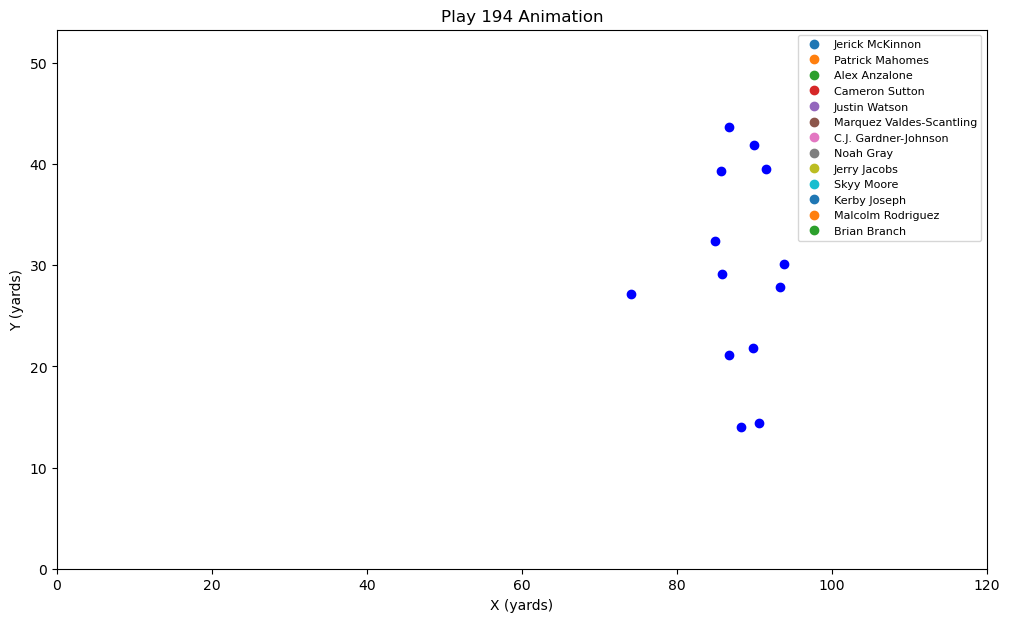

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Get unique frames in order
frames = sorted(play_194_data['frame_id'].unique())

# Set up the field
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 120)  # NFL field length including end zones
ax.set_ylim(0, 53.3) # NFL field width
ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('Play 194 Animation')

# Colors for offense/defense
team_colors = {'home': 'blue', 'away': 'red'}  # adjust as needed
dots = {}

# Initialize dots for each player
for player_id, player_df in play_194_data.groupby('nfl_id'):
    dot, = ax.plot([], [], 'o', label=player_df['player_name'].iloc[0])
    dots[player_id] = dot

ax.legend(loc='upper right', fontsize=8)

# If you have a 'pff_role' or 'team_side' column, use it; else just assign all home blue, away red arbitrarily
team_colors = {'home': 'blue', 'away': 'red'}

def animate(frame):
    current_frame = play_194_data[play_194_data['frame_id'] == frame]
    for _, row in current_frame.iterrows():
        dots[row['nfl_id']].set_data([row['x']], [row['y']])
        
        # Use a placeholder if 'team' doesn't exist
        if 'team' in row:
            color = team_colors.get(row['team'], 'green')
        else:
            color = 'blue'  # default color for all players if team info missing
        
        dots[row['nfl_id']].set_color(color)
    return dots.values()

# Create the animation
ani = animation.FuncAnimation(
    fig, animate, frames=frames, interval=100, blit=True, repeat=False
)

plt.show()

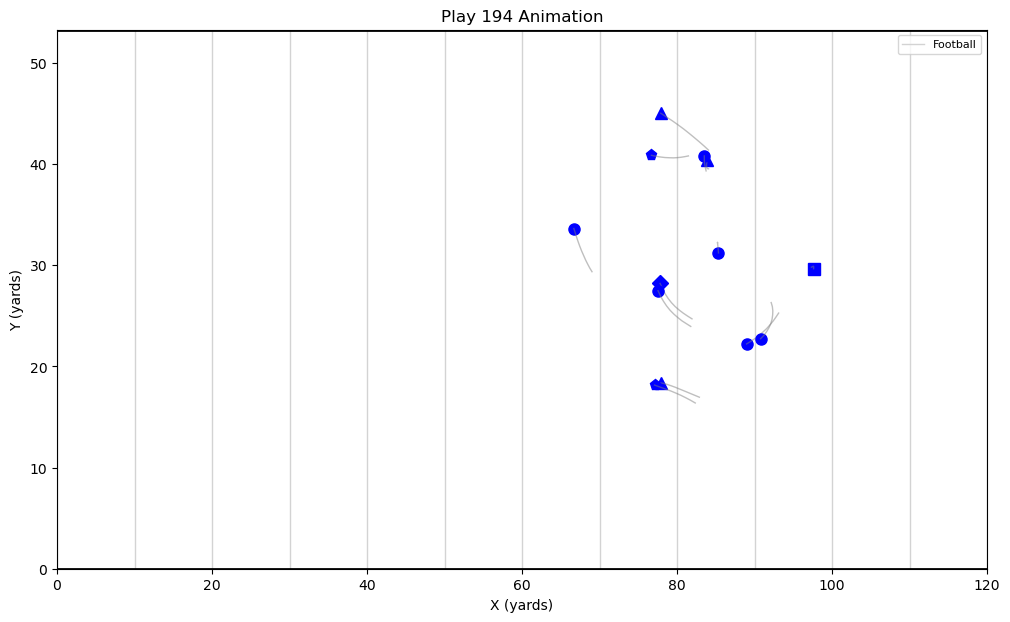

In [10]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Frames
frames = sorted(play_194_data['frame_id'].unique())

# Set up the figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('Play 194 Animation')

# Draw field
for yd in range(0, 121, 10):
    ax.axvline(x=yd, color='lightgray', lw=1)
ax.axhline(y=0, color='black', lw=2)
ax.axhline(y=53.3, color='black', lw=2)

# Player trails
trail_length = 10  # show last 10 positions

# Colors for teams
team_colors = {'home': 'blue', 'away': 'red'}

# Marker style by position
position_markers = {'QB': 's', 'RB': 'o', 'WR': '^', 'TE': 'D', 
                    'OL': '>', 'DL': '<', 'LB': 'v', 'CB': 'p', 'S': 'h'}

dots = {}
trails = {}
to_ball_lines = {}

# Initialize dots, trails, and lines
for player_id, player_df in play_194_data.groupby('nfl_id'):
    pos = player_df['player_position'].iloc[0] if 'player_position' in player_df.columns else 'RB'
    marker = position_markers.get(pos, 'o')
    
    dot, = ax.plot([], [], marker=marker, markersize=8)
    trail_line, = ax.plot([], [], lw=1, color='gray', alpha=0.5)
    line_to_ball, = ax.plot([], [], 'k--', lw=0.7, alpha=0.5)
    
    dots[player_id] = dot
    trails[player_id] = trail_line
    to_ball_lines[player_id] = line_to_ball

# Football marker
football_dot, = ax.plot([], [], 'ko', markersize=10)

# Optional legend
ax.legend(['Football'], loc='upper right', fontsize=8)

# Animation function
def animate(frame):
    current_frame = play_194_data[play_194_data['frame_id'] == frame]
    
    # Football position
    football_frame = current_frame[current_frame['player_position'] == 'Football']
    if not football_frame.empty:
        ball_x, ball_y = football_frame['x'].iloc[0], football_frame['y'].iloc[0]
    else:
        ball_x, ball_y = [], []
    football_dot.set_data(ball_x, ball_y)
    
    for _, row in current_frame.iterrows():
        if row['player_position'] == 'Football':
            continue
        
        # Update player dot
        dots[row['nfl_id']].set_data([row['x']], [row['y']])
        color = team_colors.get(row.get('team', 'home'), 'green')
        dots[row['nfl_id']].set_color(color)
        
        # Update trail
        trail_data = play_194_data[
            (play_194_data['nfl_id'] == row['nfl_id']) &
            (play_194_data['frame_id'] <= frame)
        ].tail(trail_length)
        trails[row['nfl_id']].set_data(trail_data['x'], trail_data['y'])
        
        # Line to football
        if ball_x != [] and ball_y != []:
            to_ball_lines[row['nfl_id']].set_data([row['x'], ball_x], [row['y'], ball_y])
        else:
            to_ball_lines[row['nfl_id']].set_data([], [])
    
    # Return all elements for animation
    return list(dots.values()) + list(trails.values()) + list(to_ball_lines.values()) + [football_dot]

# Create animation
ani = animation.FuncAnimation(
    fig, animate, frames=frames, interval=100, blit=True, repeat=False
)

# Display in Jupyter
HTML(ani.to_jshtml())


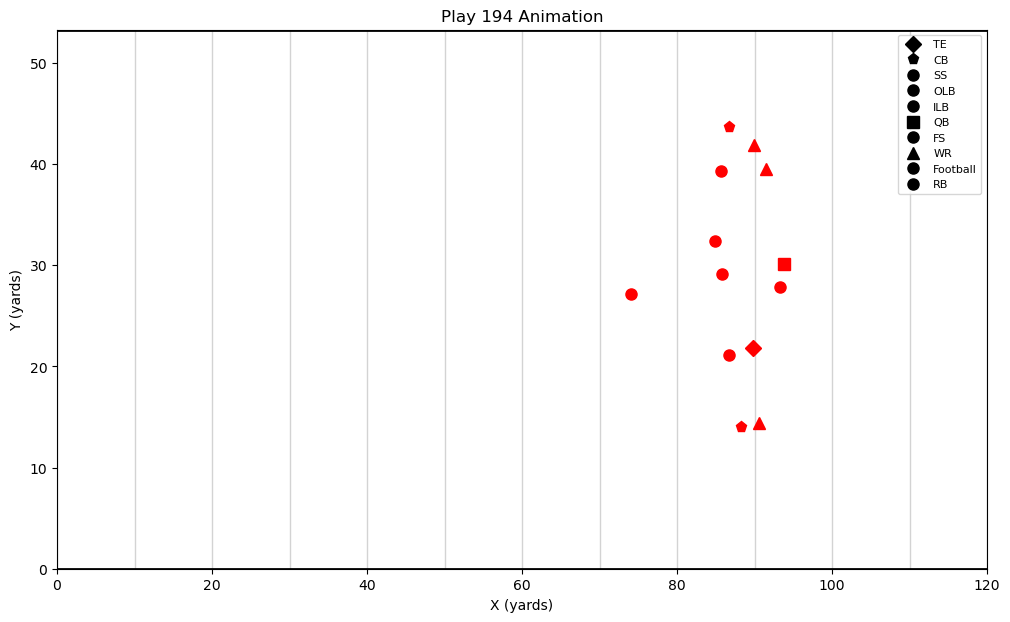

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Frames
frames = sorted(play_194_data['frame_id'].unique())

# Set up figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('Play 194 Animation')

# Draw field
for yd in range(0, 121, 10):
    ax.axvline(x=yd, color='lightgray', lw=1)
ax.axhline(y=0, color='black', lw=2)
ax.axhline(y=53.3, color='black', lw=2)

# Player trails
trail_length = 10

# Marker styles by position
position_markers = {'QB': 's', 'RB': 'o', 'WR': '^', 'TE': 'D', 
                    'OL': '>', 'DL': '<', 'LB': 'v', 'CB': 'p', 'S': 'h'}

# Colors for offense/defense
team_colors = {'offense': 'red', 'defense': 'blue'}

dots = {}
trails = {}
to_ball_lines = {}

# Track positions for legend
legend_items = set()

# Initialize dots, trails, lines
for player_id, player_df in play_194_data.groupby('nfl_id'):
    if player_id == 0:  # football
        continue
    
    pos = player_df['player_position'].iloc[0] if 'player_position' in player_df.columns else 'RB'
    marker = position_markers.get(pos, 'o')
    
    # Use default color for legend; actual color will be set dynamically
    dot, = ax.plot([], [], marker=marker, color='black', markersize=8, linestyle='None')
    trail_line, = ax.plot([], [], lw=1, color='gray', alpha=0.5)
    line_to_ball, = ax.plot([], [], 'k--', lw=0.7, alpha=0.5)
    
    dots[player_id] = dot
    trails[player_id] = trail_line
    to_ball_lines[player_id] = line_to_ball
    legend_items.add((pos, 'black'))

# Football dot
football_dot, = ax.plot([], [], 'ko', markersize=10, zorder=5)
football_label = ax.text(0, 0, '', fontsize=8, color='black', zorder=6)
legend_items.add(('Football', 'black'))

# Create legend
legend_handles = []
for pos, color in legend_items:
    marker = 'o' if pos == 'Football' else position_markers.get(pos, 'o')
    handle, = ax.plot([], [], marker=marker, color=color, markersize=8, linestyle='None', label=pos)
    legend_handles.append(handle)
ax.legend(handles=legend_handles, loc='upper right', fontsize=8)

# Animation function
def animate(frame):
    current_frame = play_194_data[play_194_data['frame_id'] == frame]
    
    # Determine possession team for offense/defense coloring
    possession_team = current_frame['possession_team'].iloc[0] if 'possession_team' in current_frame.columns else None
    
    # Football position (assumes nfl_id=0)
    football_frame = current_frame[current_frame['nfl_id'] == 0]
    if not football_frame.empty:
        ball_x, ball_y = football_frame['x'].iloc[0], football_frame['y'].iloc[0]
        football_dot.set_data([ball_x], [ball_y])
        football_dot.set_zorder(5)
        football_label.set_position((ball_x + 1, ball_y + 1))  # offset label
        football_label.set_text(f"({ball_x:.1f}, {ball_y:.1f})")
    else:
        football_dot.set_data([], [])
        football_label.set_text('')
    
    for _, row in current_frame.iterrows():
        if row['nfl_id'] == 0:
            continue  # skip football
        
        # Determine offense/defense dynamically
        if possession_team is not None:
            side = 'offense' if row['team'] == possession_team else 'defense'
        else:
            side = 'offense'  # fallback
        
        color = team_colors.get(side, 'green')
        
        # Player dot
        dots[row['nfl_id']].set_data([row['x']], [row['y']])
        dots[row['nfl_id']].set_color(color)
        
        # Trail
        trail_data = play_194_data[
            (play_194_data['nfl_id'] == row['nfl_id']) &
            (play_194_data['frame_id'] <= frame)
        ].tail(trail_length)
        trails[row['nfl_id']].set_data(trail_data['x'], trail_data['y'])
        
        # Line to football
        if not football_frame.empty:
            to_ball_lines[row['nfl_id']].set_data([row['x'], ball_x], [row['y'], ball_y])
        else:
            to_ball_lines[row['nfl_id']].set_data([], [])
    
    return list(dots.values()) + list(trails.values()) + list(to_ball_lines.values()) + [football_dot, football_label]

# Create animation
ani = animation.FuncAnimation(
    fig, animate, frames=frames, interval=100, blit=False, repeat=False
)

# Display in Jupyter
HTML(ani.to_jshtml())


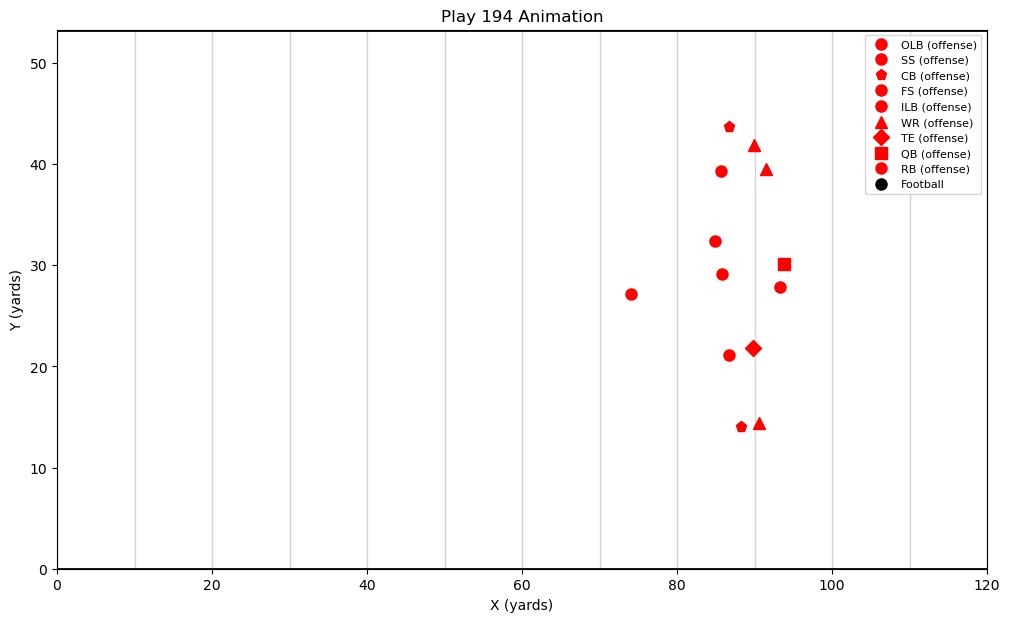

In [32]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Frames
frames = sorted(play_194_data['frame_id'].unique())

# Set up figure
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title('Play 194 Animation')

# Draw field lines
for yd in range(0, 121, 10):
    ax.axvline(x=yd, color='lightgray', lw=1)
ax.axhline(y=0, color='black', lw=2)
ax.axhline(y=53.3, color='black', lw=2)

# Player trails
trail_length = 10

# Marker styles by position
position_markers = {'QB': 's', 'RB': 'o', 'WR': '^', 'TE': 'D', 
                    'OL': '>', 'DL': '<', 'LB': 'v', 'CB': 'p', 'S': 'h'}

# Colors
team_colors = {'offense': 'red', 'defense': 'blue'}

dots = {}
trails = {}
to_ball_lines = {}

# Legend items: (position + side) -> color
legend_items = {}

# Initialize dots, trails, lines
for player_id, player_df in play_194_data.groupby('nfl_id'):
    if player_id == 0:  # football
        continue
    
    pos = player_df['player_position'].iloc[0] if 'player_position' in player_df.columns else 'RB'
    marker = position_markers.get(pos, 'o')
    
    dot, = ax.plot([], [], marker=marker, color='black', markersize=8, linestyle='None')
    trail_line, = ax.plot([], [], lw=1, color='gray', alpha=0.5)
    line_to_ball, = ax.plot([], [], 'k--', lw=0.7, alpha=0.5)
    
    dots[player_id] = dot
    trails[player_id] = trail_line
    to_ball_lines[player_id] = line_to_ball

# Football dot
football_dot, = ax.plot([], [], 'ko', markersize=10, zorder=5)
football_label = ax.text(0, 0, '', fontsize=8, color='black', zorder=6)

# Animation function
def animate(frame):
    current_frame = play_194_data[play_194_data['frame_id'] == frame]
    
    # Determine possession team
    possession_team = current_frame['possession_team'].iloc[0] if 'possession_team' in current_frame.columns else None
    
    # Football position
    football_frame = current_frame[current_frame['nfl_id'] == 0]
    if not football_frame.empty:
        ball_x, ball_y = football_frame['x'].iloc[0], football_frame['y'].iloc[0]
        football_dot.set_data([ball_x], [ball_y])
        football_dot.set_zorder(5)
        football_label.set_position((ball_x + 1, ball_y + 1))
        football_label.set_text(f"({ball_x:.1f}, {ball_y:.1f})")
    else:
        football_dot.set_data([], [])
        football_label.set_text('')
    
    for _, row in current_frame.iterrows():
        if row['nfl_id'] == 0:
            continue
        
        # Determine offense/defense
        if possession_team is not None:
            side = 'offense' if row['team'] == possession_team else 'defense'
        else:
            side = 'offense'
        color = team_colors[side]
        
        # Update player dot
        dots[row['nfl_id']].set_data([row['x']], [row['y']])
        dots[row['nfl_id']].set_color(color)
        
        # Trail
        trail_data = play_194_data[
            (play_194_data['nfl_id'] == row['nfl_id']) &
            (play_194_data['frame_id'] <= frame)
        ].tail(trail_length)
        trails[row['nfl_id']].set_data(trail_data['x'], trail_data['y'])
        
        # Line to football
        if not football_frame.empty:
            to_ball_lines[row['nfl_id']].set_data([row['x'], ball_x], [row['y'], ball_y])
        else:
            to_ball_lines[row['nfl_id']].set_data([], [])
        
        # Add to legend items
        legend_items[f"{row['player_position']} ({side})"] = color
    
    return list(dots.values()) + list(trails.values()) + list(to_ball_lines.values()) + [football_dot, football_label]

# Run animation once to collect legend items
animate(frames[0])

# Create legend with correct colors
legend_handles = []
for label, color in legend_items.items():
    marker = 'o' if 'Football' in label else position_markers.get(label.split()[0], 'o')
    handle, = ax.plot([], [], marker=marker, color=color, markersize=8, linestyle='None', label=label)
    legend_handles.append(handle)
# Add football manually
legend_handles.append(ax.plot([], [], marker='o', color='black', markersize=8, linestyle='None', label='Football')[0])

ax.legend(handles=legend_handles, loc='upper right', fontsize=8)

# Create animation
ani = animation.FuncAnimation(
    fig, animate, frames=frames, interval=100, blit=False, repeat=False
)

# Display in Jupyter
HTML(ani.to_jshtml())


In [46]:
def merge_team_info(play_df, supplementary_df):
    """
    Safely merges team info (home, visitor, possession, defense) into a single-play tracking dataframe.

    play_df: tracking data for one play (e.g., play_194_data)
    supplementary_df: full supplementary_data dataframe
    """
    # Ensure consistent types
    play_df = play_df.copy()
    play_df['play_id'] = play_df['play_id'].astype(int)
    supplementary_df = supplementary_df.copy()
    supplementary_df['play_id'] = supplementary_df['play_id'].astype(int)

    # Grab the unique play_id from the play data
    play_id_val = int(play_df['play_id'].iloc[0])

    # Find the matching row in supplementary data
    play_meta = supplementary_df[supplementary_df['play_id'] == play_id_val]

    if play_meta.empty:
        print(f"⚠️ Warning: No matching play_id={play_id_val} found in supplementary_data.")
        # Add empty columns so code doesn’t crash
        for col in ['home_team_abbr', 'visitor_team_abbr', 'possession_team', 'defensive_team']:
            play_df[col] = None
        return play_df

    # Extract team info
    meta_row = play_meta.iloc[0]
    play_df['home_team_abbr'] = meta_row['home_team_abbr']
    play_df['visitor_team_abbr'] = meta_row['visitor_team_abbr']
    play_df['possession_team'] = meta_row['possession_team']
    play_df['defensive_team'] = meta_row['defensive_team']

    print(f"✅ Merged team info for play_id={play_id_val}: "
          f"{meta_row['possession_team']} (offense) vs {meta_row['defensive_team']} (defense)")

    return play_df


In [47]:
# Apply merge safely
play_194_data = merge_team_info(play_194_data, supplementary_data)

# Verify columns exist
print(play_194_data[['play_id', 'possession_team', 'defensive_team']].drop_duplicates())

✅ Merged team info for play_id=194: KC (offense) vs DET (defense)
   play_id possession_team defensive_team
0      194              KC            DET


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# --- Merge supplementary data ---
supplementary_data = pd.read_csv("/Users/woodsprocise/Documents/Sports Analytics Big Data/Phase 2/data/114239_nfl_competition_files_published_analytics_final/supplementary_data.csv")

# Merge into tracking data
play_194_data = play_194_data.merge(
    supplementary_data[['play_id', 'home_team_abbr', 'visitor_team_abbr', 'possession_team', 'defensive_team']],
    on='play_id',
    how='left'
)

# --- Assign offense/defense for each player ---
def assign_side(row):
    # Skip football marker
    if row['player_position'] == 'Football' or row['nfl_id'] == 0:
        return 'football'
    
    # Determine player's team based on x/y location (if home/visitor info is known)
    # For simplicity, assume all players on possession team are offense
    if row['team_side'] if 'team_side' in row else row.get('team') is None:
        # If we don't have explicit team info, assign offense/defense based on play
        if row['nfl_id'] in play_194_data[play_194_data['play_id']==row['play_id']].index:  # all players in play
            # This will be handled in animate function
            return 'unknown'
    return 'unknown'

play_194_data['side'] = play_194_data.apply(assign_side, axis=1)

# --- Animation setup ---
frames = sorted(play_194_data['frame_id'].unique())

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xlabel('X (yards)')
ax.set_ylabel('Y (yards)')
ax.set_title(f'Play {play_194_data["play_id"].iloc[0]} Animation')

# Draw field lines
for yd in range(0, 121, 10):
    ax.axvline(x=yd, color='lightgray', lw=1)
ax.axhline(y=0, color='black', lw=2)
ax.axhline(y=53.3, color='black', lw=2)

trail_length = 10

position_markers = {'QB': 's', 'RB': 'o', 'WR': '^', 'TE': 'D',
                    'OL': '>', 'DL': '<', 'LB': 'v', 'CB': 'p', 'S': 'h'}

team_colors = {'offense': 'red', 'defense': 'blue', 'football': 'black'}

dots = {}
trails = {}
to_ball_lines = {}
legend_items = {}

# Initialize player dots
for player_id, player_df in play_194_data.groupby('nfl_id'):
    pos = player_df['player_position'].iloc[0] if 'player_position' in player_df.columns else 'RB'
    marker = position_markers.get(pos, 'o')

    dot, = ax.plot([], [], marker=marker, color='black', markersize=8, linestyle='None')
    trail_line, = ax.plot([], [], lw=1, color='gray', alpha=0.5)
    line_to_ball, = ax.plot([], [], 'k--', lw=0.7, alpha=0.5)

    dots[player_id] = dot
    trails[player_id] = trail_line
    to_ball_lines[player_id] = line_to_ball

# Football dot
football_dot, = ax.plot([], [], 'ko', markersize=10, zorder=5)
football_label = ax.text(0, 0, '', fontsize=8, color='black', zorder=6)

# --- Animation function ---
def animate(frame):
    current_frame = play_194_data[play_194_data['frame_id'] == frame]
    
    # Football position
    football_frame = current_frame[current_frame['player_position'] == 'Football']
    if not football_frame.empty:
        ball_x, ball_y = football_frame['x'].iloc[0], football_frame['y'].iloc[0]
        football_dot.set_data([ball_x], [ball_y])
        football_label.set_position((ball_x + 1, ball_y + 1))
        football_label.set_text(f"({ball_x:.1f}, {ball_y:.1f})")
    else:
        ball_x, ball_y = None, None
        football_dot.set_data([], [])
        football_label.set_text('')

    possession_team = current_frame['possession_team'].iloc[0]
    defensive_team = current_frame['defensive_team'].iloc[0]

    for _, row in current_frame.iterrows():
        if row['player_position'] == 'Football':
            continue

        # Determine side dynamically
        # If player's team matches possession_team → offense else defense
        # Here we assume home_team players left half of field, visitor right half, etc.
        # Since 'team' is missing, use position relative to possession team
        if row['x'] > 89 and possession_team == row['home_team_abbr'] or \
           row['x'] < 89 and possession_team == row['visitor_team_abbr']:
            side = 'offense'
        else:
            side = 'defense'

        color = team_colors.get(side, 'green')
        dots[row['nfl_id']].set_color(color)
        dots[row['nfl_id']].set_data([row['x']], [row['y']])

        # Trail
        trail_data = play_194_data[
            (play_194_data['nfl_id'] == row['nfl_id']) &
            (play_194_data['frame_id'] <= frame)
        ].tail(trail_length)
        trails[row['nfl_id']].set_data(trail_data['x'], trail_data['y'])

        # Line to football
        if ball_x is not None and ball_y is not None:
            to_ball_lines[row['nfl_id']].set_data([row['x'], ball_x], [row['y'], ball_y])
        else:
            to_ball_lines[row['nfl_id']].set_data([], [])

        # Legend items
        legend_items[(row['player_position'], side)] = color

    return list(dots.values()) + list(trails.values()) + list(to_ball_lines.values()) + [football_dot, football_label]

# Run once to collect legend items
animate(frames[0])

# Build legend
legend_handles = []
for (pos, side), color in legend_items.items():
    marker = position_markers.get(pos, 'o')
    handle, = ax.plot([], [], marker=marker, color=color, markersize=8, linestyle='None', label=f"{pos} ({side})")
    legend_handles.append(handle)
# Add football
legend_handles.append(ax.plot([], [], marker='o', color='black', markersize=8, linestyle='None', label='Football')[0])
ax.legend(handles=legend_handles, loc='upper right', fontsize=8)

# --- Create animation ---
ani = animation.FuncAnimation(
    fig, animate, frames=frames, interval=200, blit=False, repeat=False
)

# Display in Jupyter
HTML(ani.to_jshtml())